## Is there a relationship between when a tweet was posted and its sentiment?

In [114]:
%matplotlib inline
from sklearn.cross_validation import train_test_split
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from __future__ import division
from collections import Counter
import pandas as pd
import numpy as np
import string
import seaborn as sns
import re

tweets_data_path = 'Tweets.csv'
tweets = pd.read_csv(tweets_data_path, header=0, parse_dates=['tweet_created'])


Split when a tweet was created into components.

In [115]:
tweets['hour'] = tweets.tweet_created.apply(lambda x: x.hour)
tweets['day_of_week'] = tweets.tweet_created.apply(lambda x: x.dayofweek)
tweets['day_of_month'] = tweets.tweet_created.apply(lambda x: x.day)

Helper functions. The first groups the tweets by the unique values of the feature passed in as a parameter, then calculates the percentage of those tweets that were positive, negative and neutral. The second takes a dataframe produced by the first function and plots the percentages.

In [159]:
def createSentDf(colName):
    sentList = []
    for val in tweets[colName].unique():
        sentList.append(pd.Series(tweets[(tweets[colName] == val)].airline_sentiment.value_counts() / tweets[tweets[colName] == val].shape[0], name=val))
    return pd.DataFrame(sentList).sort_index()


def createSentPercentagePlot(df, xLabel, xpadding):
    plt.figure(figsize=(10,8))
    ind = range(0, df.index.shape[0])
    for rowInDf, i in (zip(df.index.values, ind)):
        sentimentPercentages = df.iloc[rowInDf, :]
        p1 = plt.bar(i, sentimentPercentages.negative, color='r')
        p2 = plt.bar(i, sentimentPercentages.neutral, bottom=sentimentPercentages.negative, color='y')
        p3 = plt.bar(i, sentimentPercentages.positive, bottom=sentimentPercentages.neutral + sentimentPercentages.negative, color='g')
    
    plt.ylim([0,1.1])
    plt.xlim([0, len(df.index.values) + xpadding])
    plt.legend((p1[0], p2[0], p3[0]), ('Negative', 'Neutral', 'Positive'), loc='best')
    plt.xticks(ind, df.index.values)
    plt.xlabel(xLabel)
    plt.ylabel('Percentage of Tweets')
    plt.show()

Calculate the sentiment of tweets that occured during each hour of the day.

In [131]:
sentByHourDf = createSentDf('hour')
sentByHourDf.head()

,negative,neutral,positive
0,0.630790,0.207084,0.162125
1,0.598143,0.213528,0.188329
2,0.635153,0.190413,0.174434
3,0.714074,0.151111,0.134815
4,0.646179,0.189369,0.164452


Plot those percentages for each hour. There seems to be a small spike in negativity around 7-9am, but nothing dramatic.

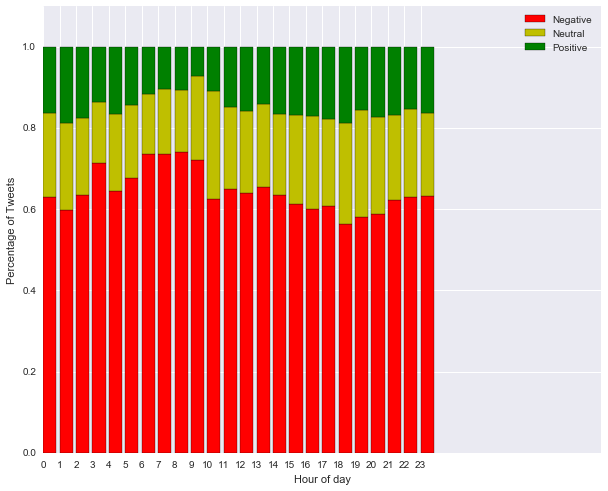

In [160]:
createSentPercentagePlot(sentByHourDf, 'Hour of day', 10)

Now do the same for day of the week. Again, some variation in sentiment, but nothing crazy.

In [157]:
sentByDayOfWeek = createSentDf('day_of_week')
sentByDayOfWeek

,negative,neutral,positive
0,0.667425,0.202276,0.130299
1,0.597281,0.231790,0.170929
2,0.584040,0.214689,0.201271
3,0.513097,0.266564,0.220339
4,0.561508,0.253307,0.185185
5,0.635402,0.191819,0.172779
6,0.729097,0.153428,0.117475


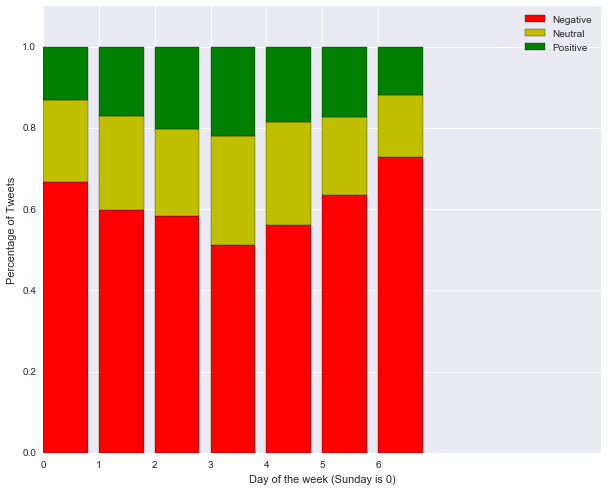

In [162]:
createSentPercentagePlot(sentByDayOfWeek, 'Day of the week (Sunday is 0)', 3)

## What happenened on February 23rd?

Plot the number of tweets per day during the 8 day period covered in the data set. The volume was higher on the twenty-second, twenty-third and twenty-fourth. Did something happen on those days?

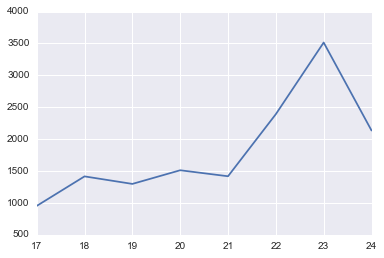

In [118]:
tweets.day_of_month.value_counts().sort_index().plot()

Read in weather data for weather stations in the New York, Boston, DC and Chicago (from http://www.ncdc.noaa.gov/) for the time period of our tweet data. Plot the number of tweets per day and average snowfall per day for each weather station.

A storm dumped snow on much of the eastern US on February 22nd. Could that have grounded flights, increasing the number of tweets? It's possible, but, if so, why weren't there more tweets on the 17th and 18th?

Weekly air travel/tweeting patterns could also account for the spike in tweets. Perhaps more people fly or tweet about flying on Sunday (22nd) and Monday (23rd) every week? Unforunately, our data only spans one week, so we can't investigate any weekly trends. 

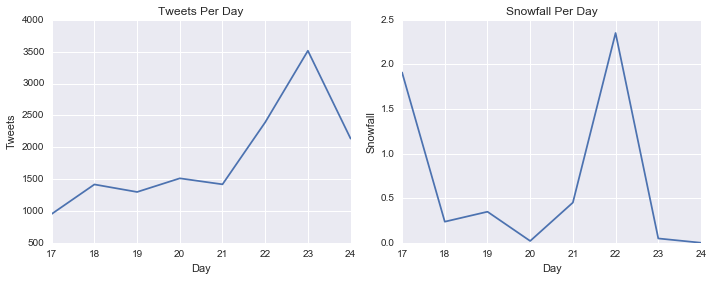

In [119]:
weather = pd.read_csv('weather.csv', parse_dates=['DATE'])
weather.columns = [col.lower() for col in weather.columns]
weather = weather.applymap(lambda x: np.nan if x == -9999 else x)



fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 4))
sorted_dates =  np.sort(tweets.day_of_month.unique())
tweets_per_day = tweets.day_of_month.value_counts().sort_index().values 
ax1.plot(sorted_dates,tweets_per_day)
ax1.set_title('Tweets Per Day')
ax1.set_xlabel('Day')
ax1.set_ylabel('Tweets')

avg_snow_per_day = weather.groupby('date')['snow'].mean()
ax2.plot(sorted_dates,avg_snow_per_day)
ax2.set_title('Snowfall Per Day')
ax2.set_xlabel('Day')
ax2.set_ylabel('Snowfall')
plt.tight_layout()